In [1]:
files_list1 = ['W1_L200_N2.txt','W1_L200_NN.txt','W2_L100_N2.txt','W2_L100_NN.txt',\
              'W4_L50_N2.txt','W4_L50_NN.txt','W5_L40_N2.txt','W5_L40_NN.txt']

files_list2 = ['W1_L200_N_0.txt','W1_L200_N_1.txt','W2_L100_N_0.txt','W2_L100_N_1.txt',\
               'W4_L50_N_0.txt','W4_L50_N_1.txt','W5_L40_N_0.txt','W5_L40_N_1.txt']

# w1_n0_file[0].split('=')[1].split(' ')[0]
# float(w1_n0_file[0].split('=')[3].strip())

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import xmltodict


In [3]:
def energy_list(file_name):
    file = open(file_name).read().splitlines()
    lis = []
    en = []
    n = []
    for i in file:
        n_up = int(i.split('=')[1].split(' ')[0])
        energy = float(i.split('=')[3].strip())
        lis.append([n_up, energy])
        lis = sorted(lis, key=lambda x: x[0])
    for j in lis:
        en.append(j[1])
        n.append(j[0])
    return en

In [4]:
def mu_h_list(file_name1,file_name2, n):
    en1 = energy_list(file_name1)
    en2 = energy_list(file_name2)
    h = []
    mu = []
    for x in range(1, n):
        h.append((en2[x - 1] - en1[x]) / -2)
        mu.append((en2[x + 1] - en1[x]) / 2)
    return mu,h

In [5]:
n = 60
mu1 = mu_h_list(files_list2[0], files_list2[1],n)[0]
h1 = mu_h_list(files_list2[0], files_list2[1], n)[1]

n=43
mu2 = mu_h_list(files_list2[2], files_list2[3],n)[0]
h2= mu_h_list(files_list2[2], files_list2[3], n)[1]

n=17
mu4 = mu_h_list(files_list2[4], files_list2[5],n)[0]
h4= mu_h_list(files_list2[4], files_list2[5], n)[1]

n=12
mu5 = mu_h_list(files_list2[6], files_list2[7],n)[0]
h5= mu_h_list(files_list2[6], files_list2[7], n)[1]

In [6]:
mu1_new = [x - mu1[0] for x in mu1]
h1_new = [x - h1[0] for x in h1]

mu2_new = [x - mu2[0] for x in mu2]
h2_new = [x - h2[0] for x in h2]

mu4_new = [x - mu4[0] for x in mu4]
h4_new = [x - h4[0] for x in h4]

mu5_new = [x - mu5[0] for x in mu5]
h5_new = [x - h5[0] for x in h5]

<IPython.core.display.Javascript object>


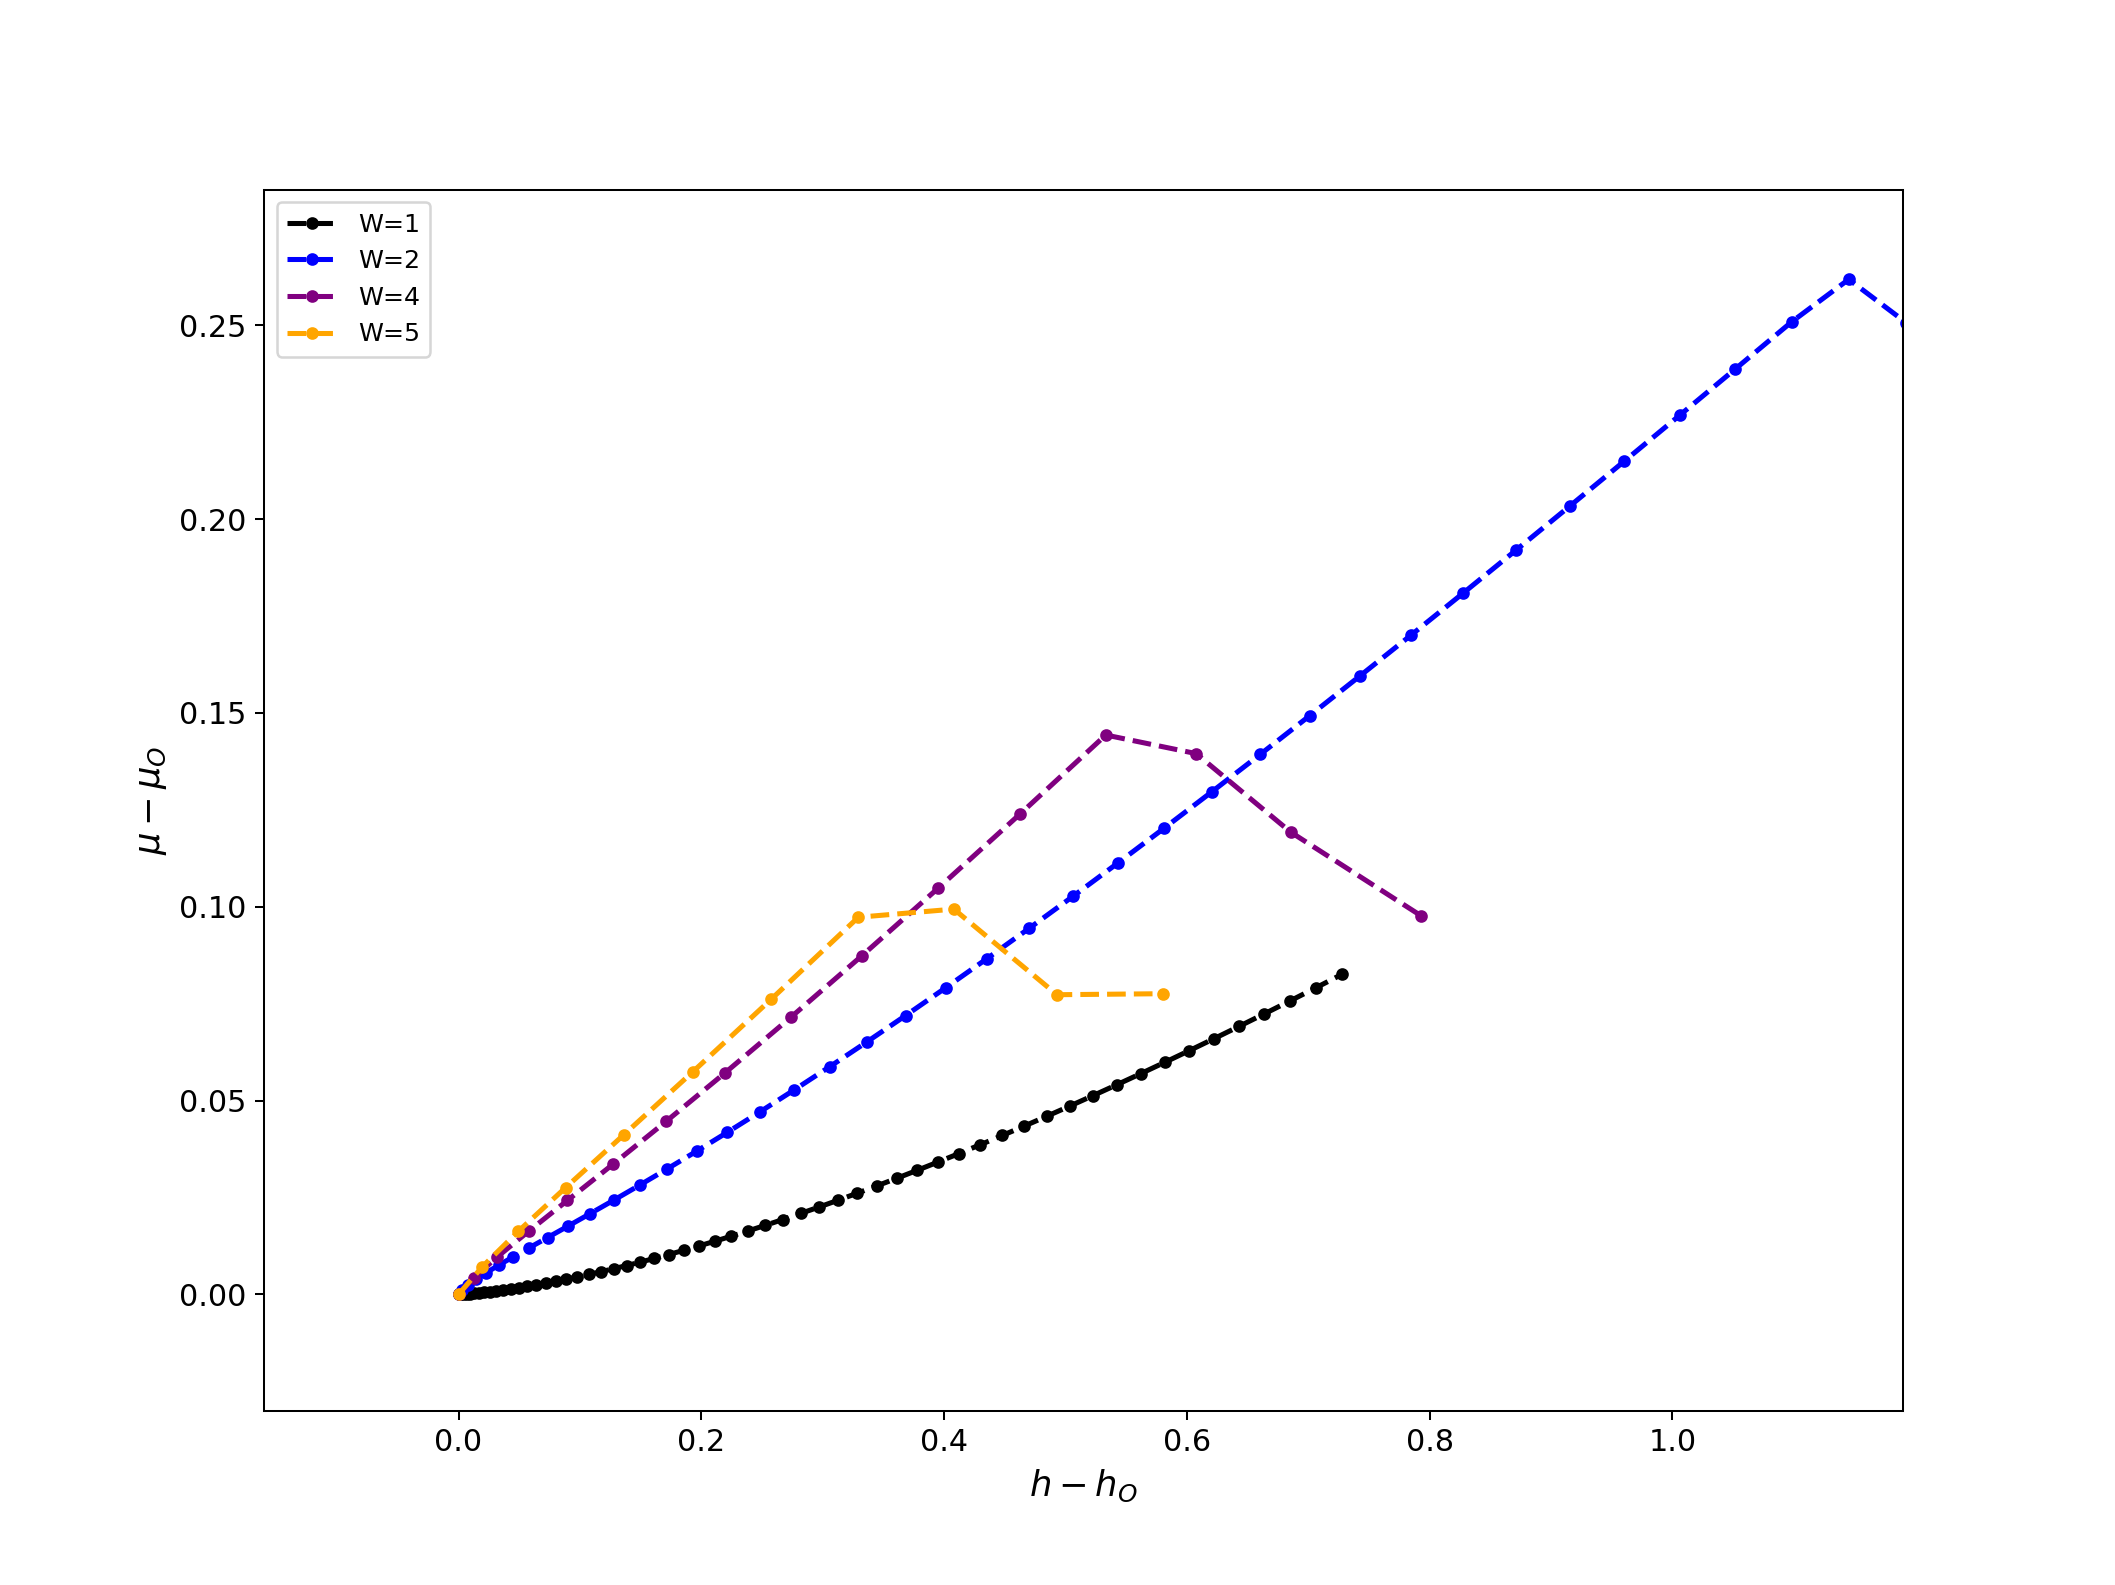

In [7]:
%matplotlib notebook
kwds = dict(ls='--', marker='o', lw=2, markersize=4)
plt.plot(h1_new, mu1_new, label='W=1', color='black', **kwds)
plt.plot(h2_new, mu2_new, label='W=2', color='blue', **kwds)
plt.plot(h4_new, mu4_new, label='W=4', color='purple', **kwds)
plt.plot(h5_new, mu5_new, label='W=5', color='orange', **kwds)

plt.xlabel('$h - h_O$', size=14)
plt.ylabel('$\mu - \mu_O$', size=14)

plt.gca().xaxis.set_tick_params(labelsize=12)
plt.gca().yaxis.set_tick_params(labelsize=12)

plt.ylim([-0.03, 0.285])
plt.xlim([-0.16, 1.19])

plt.legend()

## Сравнение линий

###  W=5

In [8]:
df = pd.read_excel('W5_points.xlsx')

In [9]:
# mu = -h + e(1,0)
# mu = e(1,1)/2
e11 = df[(df.Ndown_total==1) & (df.Nup_total==1)].E.values[0]


# В файлике точки 1, 0 не было - посчитал отдельно 
e10 = -3.726182409933958
def diagon(x):
    return -x + e10

In [10]:
# Пересечение 

h_w_5 = e10 - e11/2
mu_w_5 = e11/2

In [11]:
l = list(range(3, 14))

mu_w5_1, h_w5_1 = [mu_w_5], [h_w_5]
for i in l:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==1)]['E'].values[0] -
          df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0]) / 2
    h = (df[(df['Nup_total']==i-1) & (df['Ndown_total']==1)]['E'].values[0] -
         df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0]) / (-2)
    mu_w5_1.append(mu)
    h_w5_1.append(h)

In [12]:
df2_list = list(range(3, 14))

In [13]:
mu_w5_2, h_w5_2 = [mu_w_5], [h_w_5]

for i in df2_list:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i+1)]['E'].values[0] -
          df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0]) / 2
    h = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i-1)]['E'].values[0] -
         df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0]) / 2
    mu_w5_2.append(mu)
    h_w5_2.append(h)

In [14]:
e11_w5 = df[(df['Nup_total']==1) & (df['Ndown_total']==1)]['E'].values[0]
e10_w5 = df[(df['Nup_total']==1) & (df['Ndown_total']==0)]['E'].values[0]

In [15]:
(h_w5_1[0], mu_w5_1[0]), (h_w5_2[0], mu_w5_2[0])

((0.9103777965173596, -4.636560206451318),
 (0.9103777965173596, -4.636560206451318))

<IPython.core.display.Javascript object>


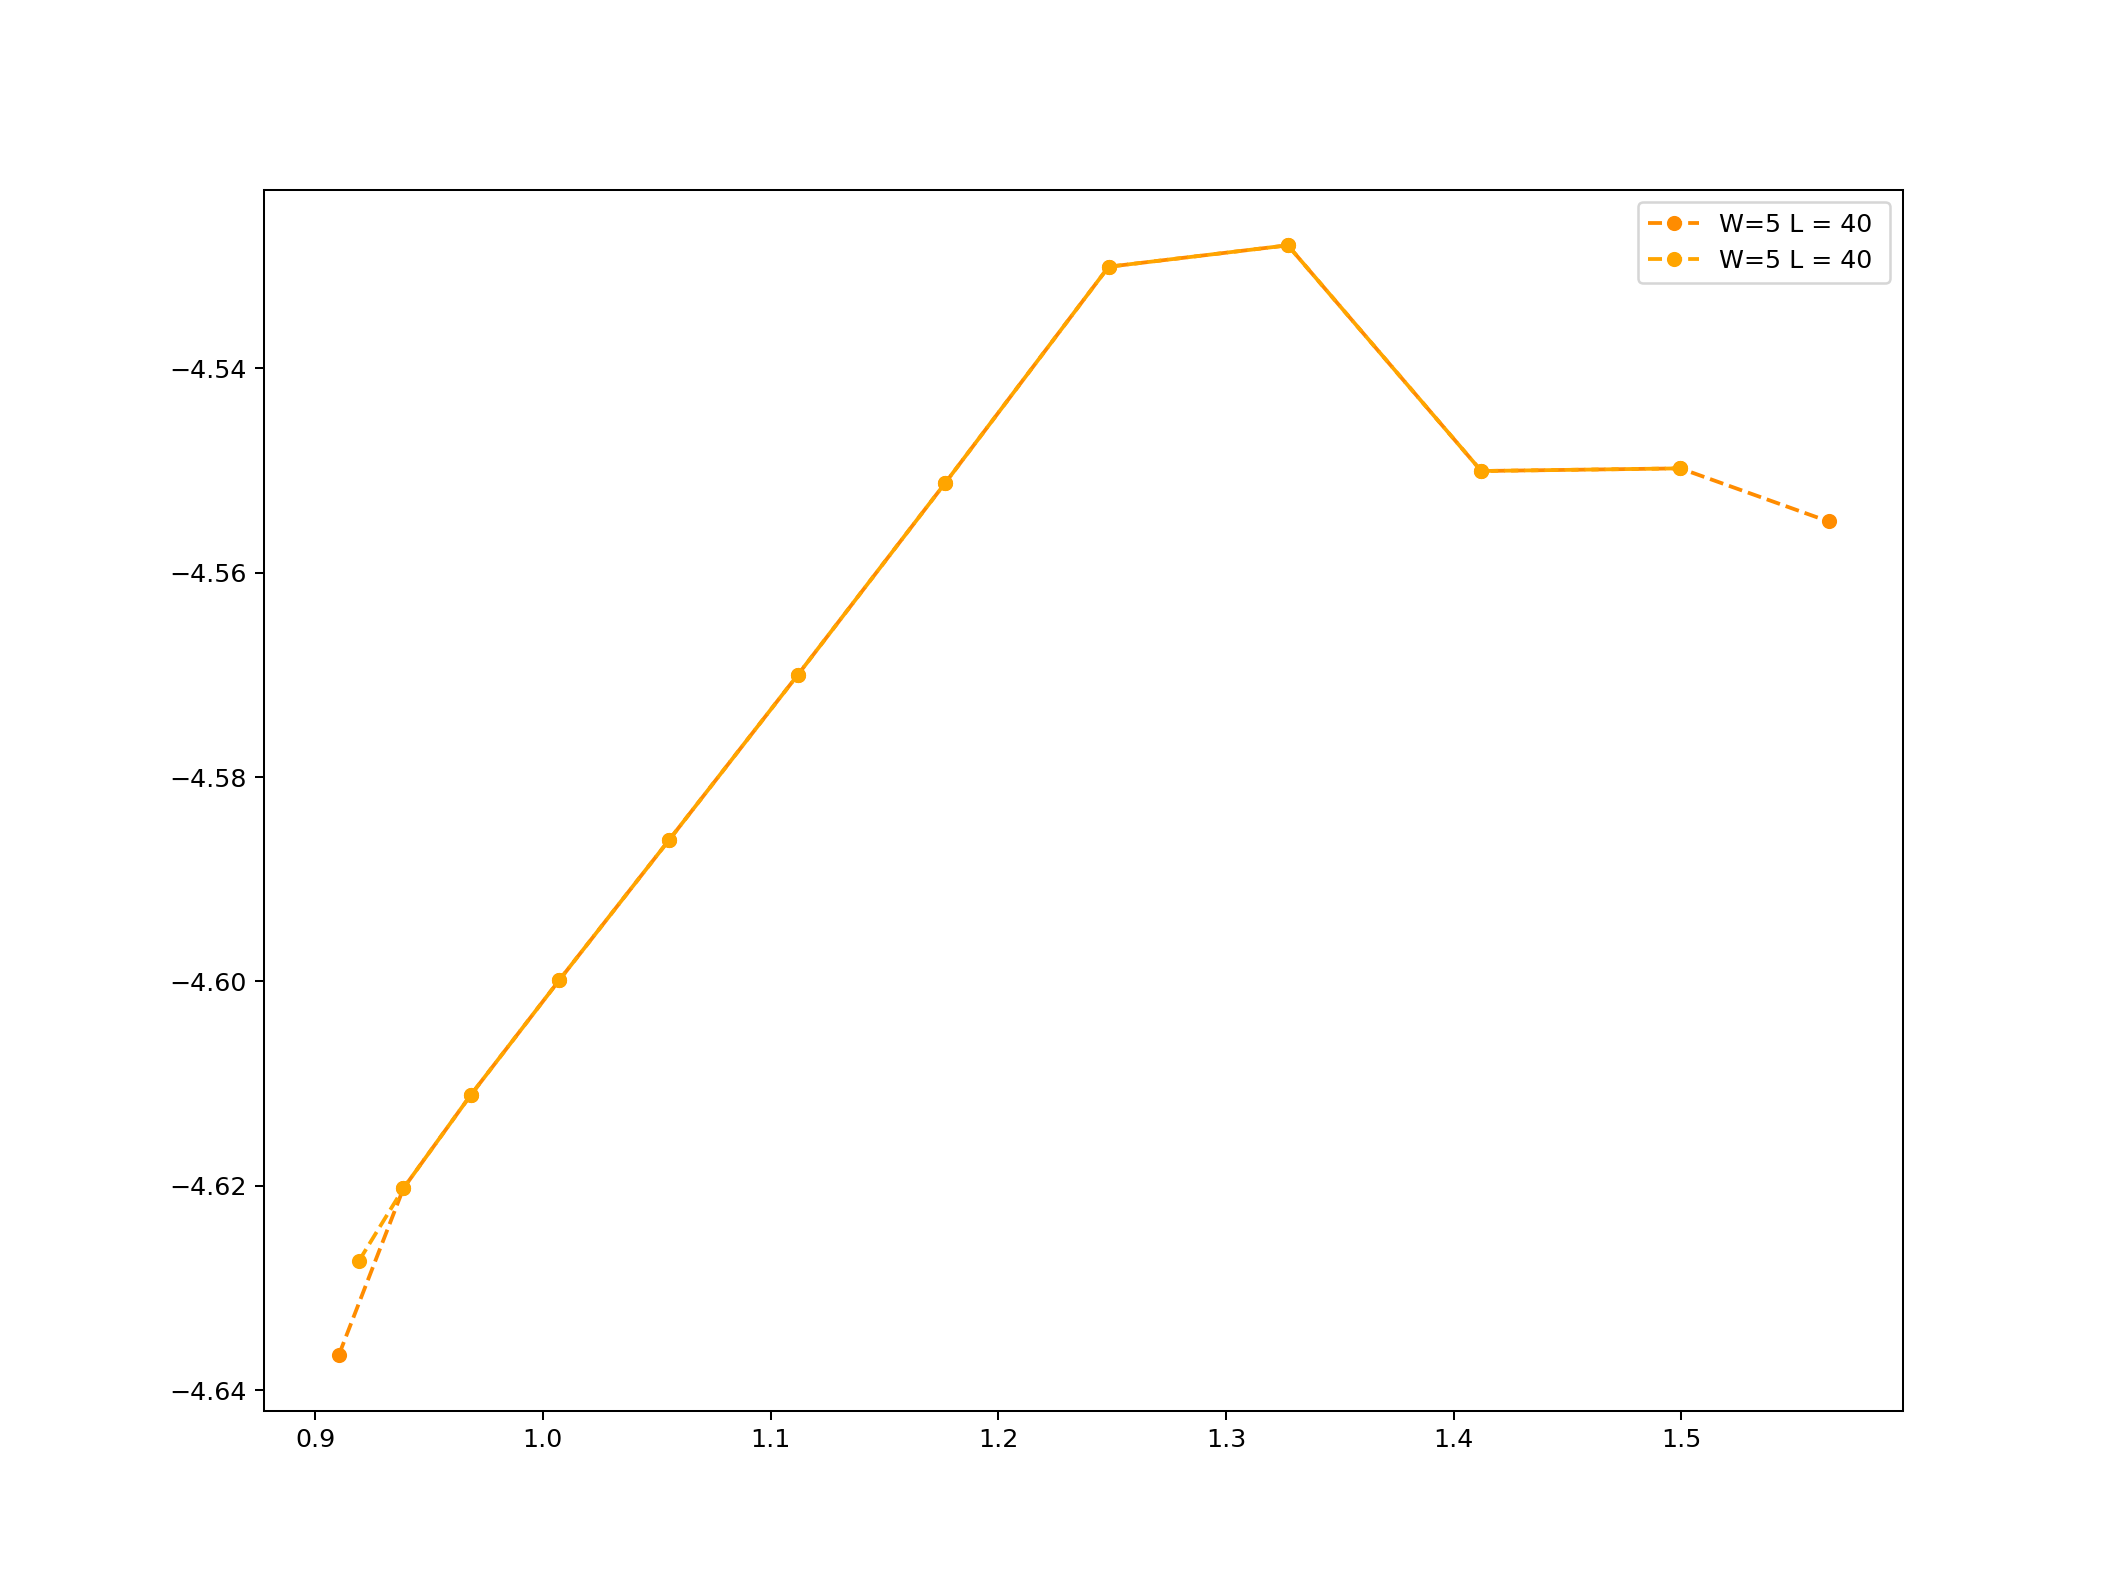

In [40]:
%matplotlib notebook

plt.plot(h_w5_1, mu_w5_1, 'o--', label='W=5 L = 40',color='darkorange', markersize=5) 
plt.plot(h5, mu5, 'o--', label='W=5 L = 40 ',color='orange', markersize=5) 
# plt.plot(h_w5_2, mu_w5_2, 'o--', label='W=5',color='orange', markersize=5)
plt.legend()

### W=4

In [20]:
df = pd.read_excel('w4-40-polaron-v3.xlsx')
df2 = pd.read_excel('w4-40-equal-v4.xlsx')

In [21]:
df2.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('eq', axis = 1, inplace = True)

In [22]:
df2 = pd.concat([df,df2])

In [23]:
e11_w4 = df2[(df2['Nup_total']==1) & (df2['Ndown_total']==1)]['E'].values[0]
e10_w4 = df2[(df2['Nup_total']==159) & (df2['Ndown_total']==0)]['E'].values[0]

# Пересечение 

h_w_4 = e10_w4 - e11_w4/2
mu_w_4 = e11_w4/2

In [24]:
l = list(range(3,30))+list(range(30,100,5))+list(range(105,156,5))+[159]

In [25]:
mu_w4_1, h_w4_1 = [mu_w_4], [h_w_4]
for i in l:
    mu = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==0)]['E'].values[0])/2
    h = (df2[(df2['Nup_total']==i-1) & (df2['Ndown_total']==1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==0)]['E'].values[0])/-2
    mu_w4_1.append(mu)
    h_w4_1.append(h)

In [26]:
df2_list = list(range(3,30))+list(range(30,81,5))

In [27]:
mu_w4_2, h_w4_2 = [mu_w_4], [h_w_4]
for i in df2_list:
    mu = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==i+1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==i)]['E'].values[0])/2
    h = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==i-1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==i)]['E'].values[0])/2
    mu_w4_2.append(mu)
    h_w4_2.append(h)

In [28]:
e11_w4 = df[(df['Nup_total']==1) & (df['Ndown_total']==1)]['E'].values[0]
e10_w4 = df[(df['Nup_total']==159) & (df['Ndown_total']==0)]['E'].values[0]

def mu(h):
    return -h +e10

def mu3(h):
    return -h - e10

h = np.arange(h_w4_1[0], 10, 0.1)
h3 = np.arange(6.5, 10, 0.1)

<IPython.core.display.Javascript object>


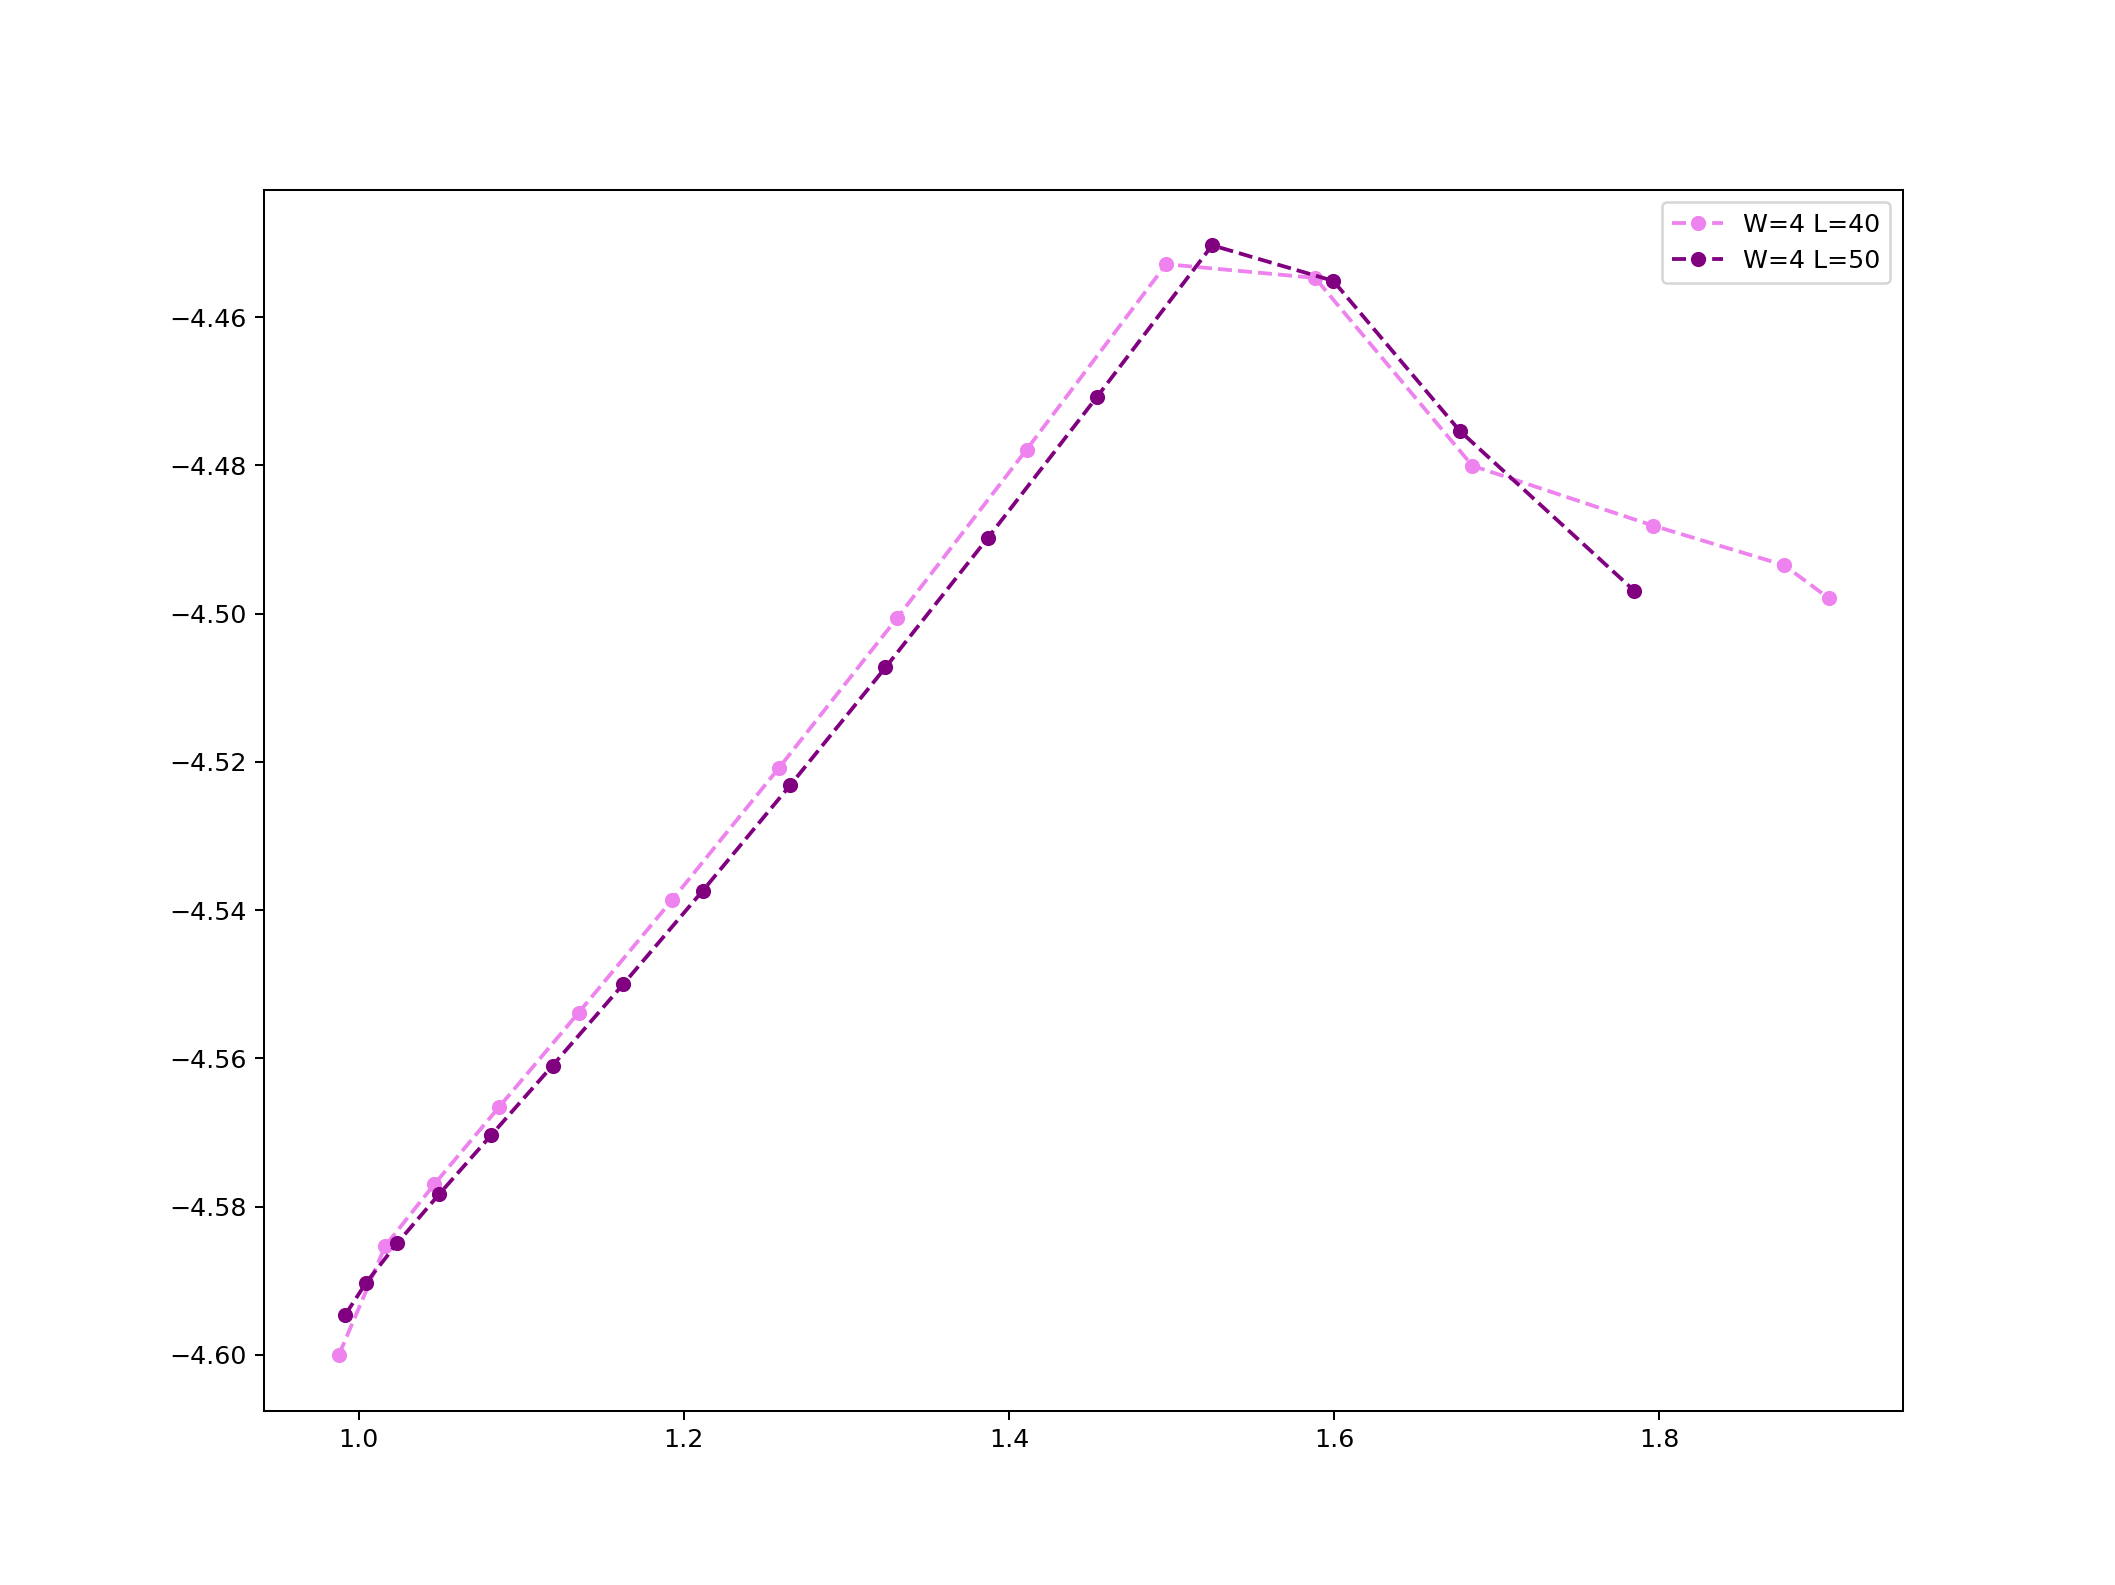

In [31]:
%matplotlib notebook
plt.plot(h_w4_1[:15], mu_w4_1[:15], 'o--', label='W=4 L=40', color='violet', markersize=5)
plt.plot(h4, mu4, 'o--', label='W=4 L=50', color='purple', markersize=5)
# plt.plot(h_w4_2[:15], mu_w4_2[:15], 'o--', color='orange', markersize=5)
plt.legend()

## W = 2

In [32]:
import os
import re

In [2]:
dir_path = re.split(r'(?<=diagrams2)/', os.getcwd())[0]
dir_path

In [1]:
def En(j, n, m):
    Energy = [] 
    path = "../w2/t-1/"  
    for i in range(n, m, 2):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
    return Energy

def En1(j, n, m):
    Energy = [] 
    path = "../w2/t-1/"
    for i in range(n, m, 4):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
        j = j + 4
    return Energy

In [35]:
e1 = En(0, 2, 79)
e2 = En(1, 3, 80)
e3 = En(1, 1, 78)
e4 = En1(1, 1, 38)
e5 = En1(2, 2, 39)
e6 = En1(0, 2, 39)
e4.append(En(39, 39, 40)[0])
e5.append(En(40, 40, 41)[0])
e6.append(En(38, 40, 41)[0])

h_w2_1 = []
mu_w2_1 = []
for x in range(len(e1)):
    h_w2_1.append((e3[x] - e1[x]) / -2)
    mu_w2_1.append((e2[x] - e1[x]) / 2)

h_w2_2 = []
mu_w2_2 = []
for x in range(len(e4)):
    h_w2_2.append((e6[x] - e4[x]) / 2)
    mu_w2_2.append((e5[x] - e4[x]) / 2)

e10_w2 = En(0, 1, 2)[0]

h2_w2 = np.arange(h_w2_1[0], 2.7, 0.1)



In [36]:
e11_w2 = e4[0]

In [37]:
# Пересечение 

h_w_2 = e10_w2 - e11_w2/2
mu_w_2 = e11_w2/2

In [38]:
h_w2_1 = [h_w_2] + h_w2_1[1:]
mu_w2_1 = [mu_w_2] + mu_w2_1[1:]
h_w2_2 = [h_w_2] + h_w2_2[1:]
mu_w2_2 = [mu_w_2] + mu_w2_2[1:]

<IPython.core.display.Javascript object>


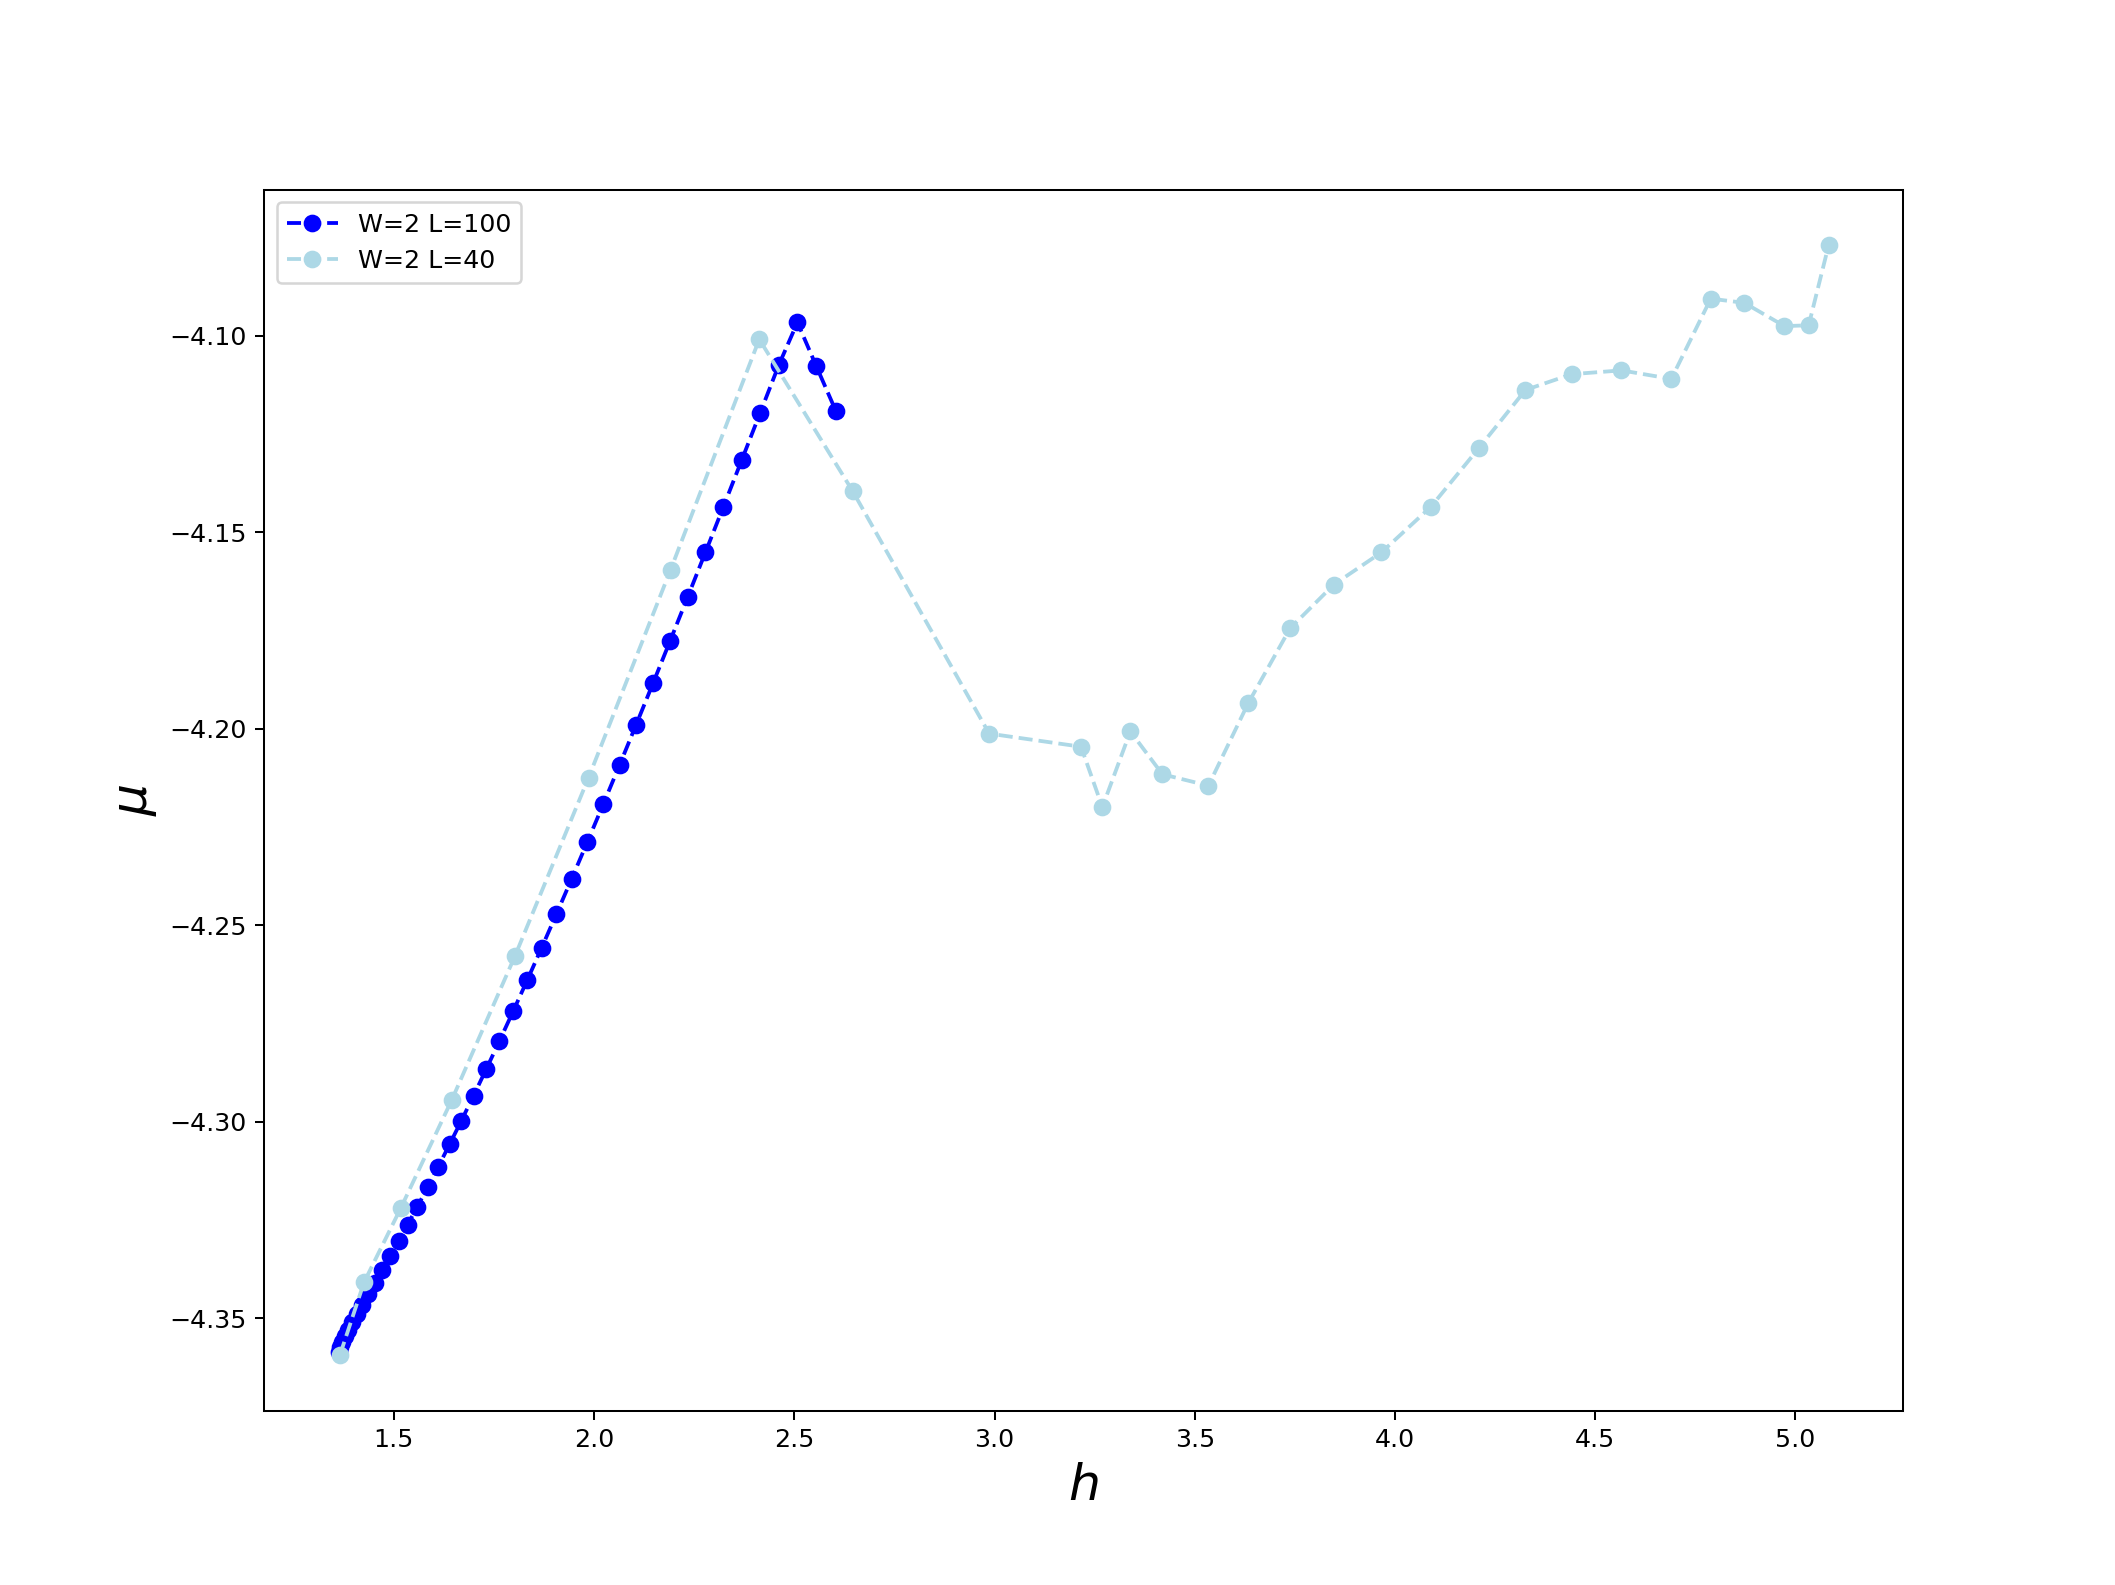

Text(0, 0.5, '$\\mu$')

In [39]:
%matplotlib notebook
plt.plot(h2, mu2, 'o--', label='W=2 L=100', color='blue')
plt.plot(h_w2_1[:30], mu_w2_1[:30], 'o--', label='W=2 L=40', color='lightblue')
# plt.plot(h_w2_2, mu_w2_2, 'o--', label='$ED-PP$')
# plt.plot(h2_w2, mu2(h2_w2), '-', label='$V-{FP_1}$')
# plt.plot(h3_w2, mu3(h3_w2), '-', label='${FP_1}-{FP_2}$')
# plt.axhline(y=(e4[0]/2), color='purple', xmax=(h_w2_1[0]/xscale),label='$ED-V$')
# plt.axvline(x=h_w2_1[0],linestyle='--', color='grey')
plt.legend()
plt.xlabel('$h$', size=20)
plt.ylabel('$\mu$', size=20)

## W = 1

In [4]:
import re

In [5]:
lst = []
with open('W1_40_energies.txt') as f:
    for line in f:
#         print(line)
        nup, ndown, e = re.findall(r'(?<== )[\d\.-]+', line)
        lst.append({'Nup':nup, 'Ndown':ndown, 'E':e})
#         {'Nup': }
#         break
df = pd.DataFrame(lst)

In [10]:
df[df.Nup == '5']

,Nup,Ndown,E
8,5,0,-9.6798809814475284
9,5,1,-15.8752795435469274
85,5,3,-28.1262407719628591
86,5,5,-40.2166321411696117


In [76]:
df.drop_duplicates(inplace = True)

In [77]:
import numpy as np

In [78]:
float(df.E.loc[0])

-1.994131602365326

In [79]:
df['Nup'] = df.Nup.astype(int)
df['Ndown'] = df.Ndown.astype(int)
df['E'] = df.E.astype(np.float64)

In [80]:
df[(df['Nup']==1) & (df['Ndown']==1)]

,Nup,Ndown,E
1,1,1,-8.060717


In [81]:
e11_w1 = df[(df['Nup']==1) & (df['Ndown']==1)]['E'].values[0]
e10_w1 = df[(df['Nup']==1) & (df['Ndown']==0)]['E'].values[0]

# Пересечение 

h_w_1 = e10_w1 - e11_w1/2
mu_w_1 = e11_w1/2

In [82]:
h_w_1, mu_w_1

(2.0362266621815293, -4.030358264546855)

In [83]:
l = list(range(2, 39))

In [84]:
mu_1_1, h_1_1 = [mu_w_1], [h_w_1]
for i in l:
    mu = (df[(df['Nup']==i+1) & (df['Ndown']==1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==0)]['E'].values[0])/2
    h = (df[(df['Nup']==i-1) & (df['Ndown']==1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==0)]['E'].values[0])/-2
    mu_1_1.append(mu)
    h_1_1.append(h)

In [85]:
mu_1_2, h_1_2 = [mu_w_1], [h_w_1]
for i in l:
    mu = (df[(df['Nup']==i+1) & (df['Ndown']==i+1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==i)]['E'].values[0])/2
    h = (df[(df['Nup']==i+1) & (df['Ndown']==i-1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==i)]['E'].values[0])/2
    mu_1_2.append(mu)
    h_1_2.append(h)
    
    

<IPython.core.display.Javascript object>


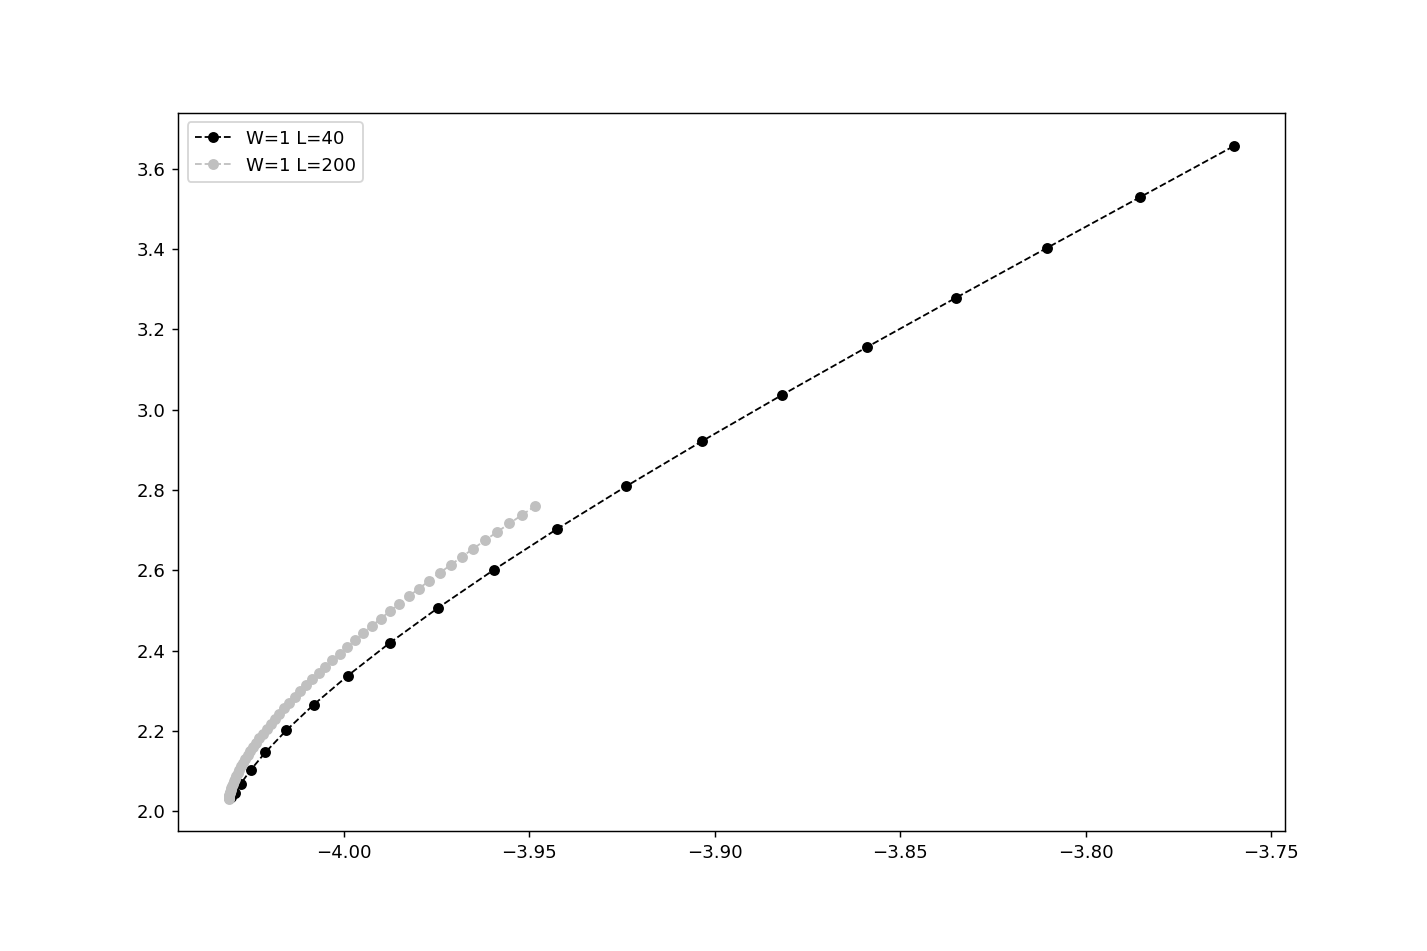

In [104]:
%matplotlib notebook
plt.plot(mu_1_1[:20], h_1_1[:20], 'o--', label='W=1 L=40', color='black', lw=1, markersize=5)
plt.plot(mu1, h1, 'o--', label='W=1 L=200', color='silver', lw=1, markersize=5)

plt.legend()